<a href="https://colab.research.google.com/github/Kimsumin1234/matplotlib/blob/main/14_%ED%80%B4%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 처리

!pip install koreanize_matplotlib

# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.8 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

In [3]:
for fpath in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
  fm.fontManager.addfont(fpath)

plt.rc("font",family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = {
    "영화" : ['명량','극한직업','신과함께 -죄와 벌','국제시장', '베테랑', '괴물', '도둑들', '7번방의 선물', '암살', '광해, 왕이 된 남자'],
    "개봉 연도" : [2014, 2019, 2017, 2014, 2015, 2006, 2012, 2013, 2015, 2012],
    "관객 수" : [1761, 1626, 1441, 1425, 1341, 1301, 1298, 1281, 1270, 1231],  # 단위 : 만명
    "평점" : [8.88, 9.20, 8.73, 9.16, 9.24, 8.62, 7.64, 8.83, 9.10, 9.25]
}

In [6]:
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께 -죄와 벌,2017,1441,8.73
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83
8,암살,2015,1270,9.10
9,"광해, 왕이 된 남자",2012,1231,9.25


### 1) 영화 데이터를 활용하여 x 축은 영화명,  y축은 평점인 막대 그래프 작성

<BarContainer object of 10 artists>

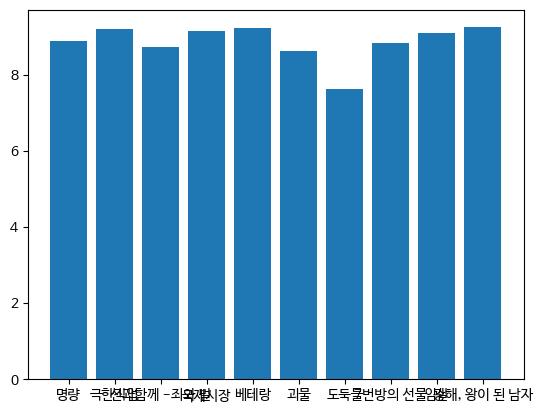

In [8]:
plt.bar(df['영화'],df['평점'])

### 2) 앞에서 작성한 막대 그래프에 아래에 제시된 세부 사항을 적용하기

- 제목 : 국내 Top10 영화 평점 정보
- x 축 label : 영화(90도 회전)
- y 축 label : 평점

Text(0, 0.5, '평점')

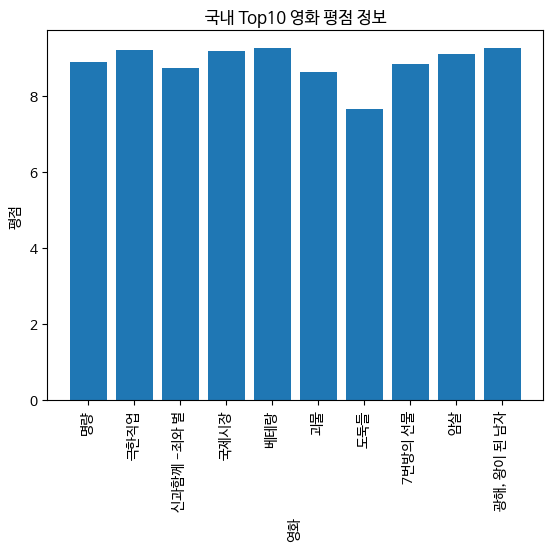

In [11]:
plt.title('국내 Top10 영화 평점 정보')
plt.bar(df['영화'],df['평점'])
plt.xlabel('영화',rotation=90)
plt.xticks(rotation=90)
plt.ylabel('평점')

### 3) 개봉 연도별 평점 변화 추이를 꺽은선 그래프로 작성하기
- 연도별 평균 데이터를 구한 후 그래프 작성

In [26]:
# df2 = df[['개봉 연도','평점']].sort_values('개봉 연도',ignore_index=True)
# df_plot = df2.groupby('개봉 연도').mean().reset_index()
# df_plot
df_plot = df.groupby('개봉 연도')['평점'].mean().reset_index()
df_plot

,개봉 연도,평점
0,2006,8.620
1,2012,8.445
2,2013,8.830
3,2014,9.020
4,2015,9.170
5,2017,8.730
6,2019,9.200


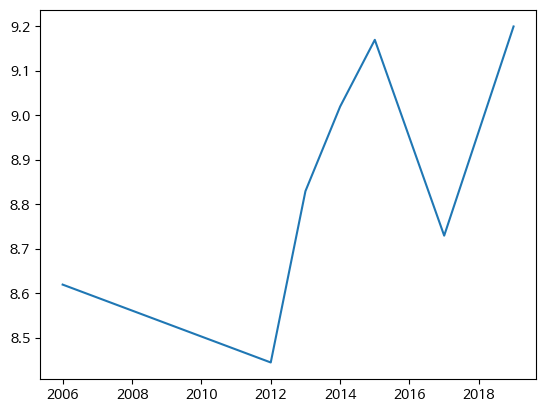

In [27]:
plt.plot(df_plot['개봉 연도'], df_plot['평점'])

### 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오

- marker : 'o'
- x축 눈금 : 5년 단위(2005, 2010, 2015, 2020)
- y축 범위 : 최소 7, 최대 10

(7.0, 10.0)

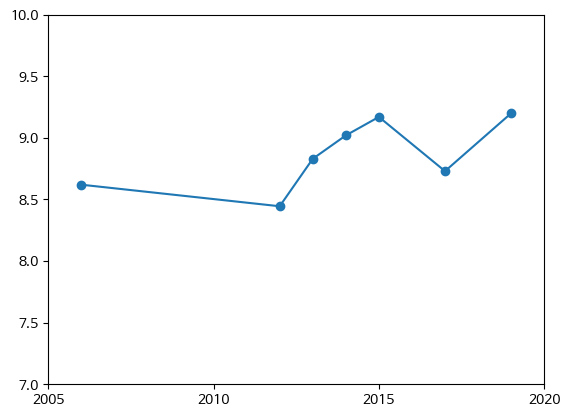

In [30]:
plt.plot(df_plot['개봉 연도'], df_plot['평점'], marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim(top=10,bottom=7)

### 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프 작성하고 세부사항을 적용하시오

- label : 9점이상 / 9점 미만
- 퍼센트 : 소수점 첫째 자리까지 표시
- 범례 : 그래프 우측에 표시

#### 9점이상

In [33]:
df_avg1 = df['평점'] >= 9.0
df_avg1

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7    False
8     True
9     True
Name: 평점, dtype: bool

#### 9점이하

In [34]:
df[~df_avg1]

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
2,신과함께 -죄와 벌,2017,1441,8.73
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83


In [36]:
# 9점 이상과 9점 이하

values = [len(df[df_avg1]),len(df[~df_avg1])]

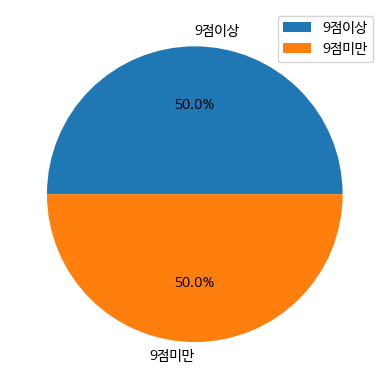

In [38]:
plt.pie(values, labels=['9점이상','9점미만'], autopct='%.1f%%')
plt.legend()